In [50]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
# ! pip install tfidf
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [51]:
# importing the csv file and converting into dataframe
df=pd.read_csv(r'C:\train_news.csv')
df.head()

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

In [52]:
# Checking for null values
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

<AxesSubplot:>

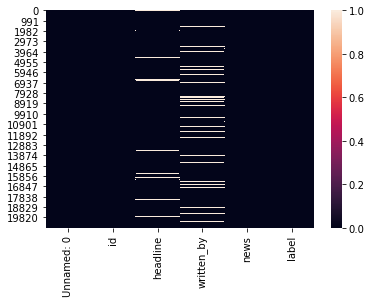

In [53]:
sns.heatmap(df.isnull())

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


As null values are present in features like headline, written_by and
news, fill the null values using mode function.

In [55]:
df['headline']=df['headline'].fillna(df['headline'].mode()[0])

In [56]:
df['written_by']=df['written_by'].fillna(df['written_by'].mode()[0])

In [57]:
df['news']=df['news'].fillna(df['news'].mode()[0])

In [58]:
df.isnull().sum()

Unnamed: 0    0
id            0
headline      0
written_by    0
news          0
label         0
dtype: int64

<AxesSubplot:>

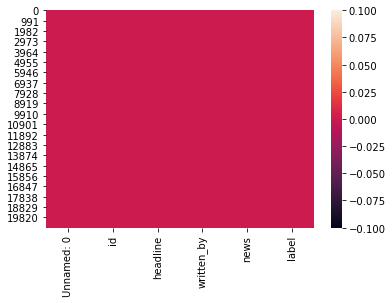

In [59]:
sns.heatmap(df.isnull())

In [60]:
# fill all the null spaces with a space
df = df.fillna(' ')
df['total'] = df['headline'] + ' ' + df['written_by'] + ' ' +\
                 df['news']

In [61]:
df

Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671  Get Ready For Civil Unrest: Survey Finds That ...   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  \
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0   
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0   
2      Sunday on ABC’s “This Week,” while discussing ...      0   
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0   
4        Finian Cunningham has written extensively on...      1   
...                                                  ...    ...   
20795  No, you'll be a dog licking of the vomit of yo...      1   
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1   
20797  posted by Eddie You know the Dakota Access Pip...      1   
20798  It’s officially summer, and the Society Boutiq...      0   
20799  Emory University in Atlanta, Georgia, has anno...      0   

                                                   total  
0      Ethics Questions Dogged Agriculture Nominee as...  
1      U.S. Must Dig Deep to Stop Argentina’s Lionel ...  
2      Cotton to House: ’Do Not Walk the Plank and Vo...  
3      Paul LePage, Besieged Maine Governor, Sends Co...  
4      A Digital 9/11 If Trump Wins Finian Cunningham...  
...                                                  ...  
20795  Get Ready For Civil Unrest: Survey Finds That ...  
20796  Albert Pike and the European Migrant Crisis Ri...  
20797  Dakota Access Caught Infiltrating Protests to ...  
20798  How to Stretch the Summer Solstice - The New Y...  
20799  Emory University to Pay for ’100 Percent’ of U...  

[20800 rows x 7 columns]

## Data Visualization

<AxesSubplot:xlabel='label', ylabel='count'>

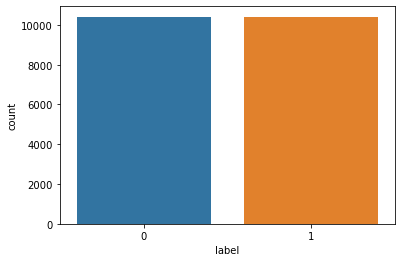

In [67]:
sns.countplot(df['label'])

In [69]:
#Check the numer of news that are true and fake
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [70]:
#Creating WordCloud to see the most frequently occuring words in each category.
# !pip install wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

In [73]:
def wordcloud(df,label):
    ss=df[df[label]==1]
    txt=ss.news.values
    wc=WordCloud(background_color="black",max_words=4000)
    wc.generate(" ".join(txt))
    
    plt.figure(figsize=(25,25))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Frequently used words in {}".format(label),fontsize=20)
    plt.imshow(wc.recolor(random_state=244),alpha=0.98)

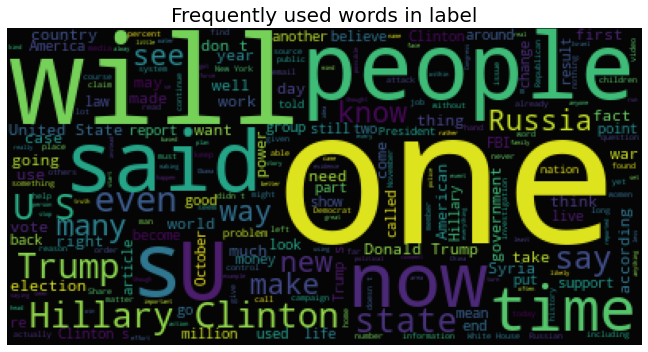

In [74]:
wordcloud(df,'label')

## Exploratory Data Analysis

In [62]:
# import ntlk
# from ntlk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [63]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sudha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [75]:
for index, row in df.iterrows():
    filter_sentence = ''
    sentence = row['total']
    # Cleaning the sentence with regex
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # Tokenization
    words = nltk.word_tokenize(sentence)
    # Stopwords removal
    words = [w for w in words if not w in stop_words]
    # Lemmatization
    for words in words:
        filter_sentence = filter_sentence  + ' ' +\
                         str(lemmatizer.lemmatize(words)).lower()
    df.loc[index, 'total'] = filter_sentence
df = df[['total', 'label']]

In [76]:
x = df['total']
y = df['label']

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x)
freq_term_matrix = count_vectorizer.transform(x)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,
                                   y, random_state=0)

In [79]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

In [81]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Accuracy = logreg.score(x_test, y_test)

In [83]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)
Accuracy = NB.score(x_test, y_test)

In [84]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
criterion={'criterion':['gini','entropy']}
dtc = DecisionTreeClassifier()
bdtc=GridSearchCV(dtc,criterion)
bdtc.fit(x_train,y_train)
bdtc.best_params_

{'criterion': 'gini'}

In [85]:
DTC=DecisionTreeClassifier(criterion='gini',random_state=42)

In [87]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators':range(50,100,150)}
rf=RandomForestClassifier(random_state=42)
brf=GridSearchCV(rf,parameters)
brf.fit(x_train,y_train)
brf.best_params_

{'n_estimators': 50}

In [88]:
RFC=RandomForestClassifier(n_estimators=50,random_state=42)

In [89]:
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='gini',random_state=42)
NB=MultinomialNB()
RFC=RandomForestClassifier(n_estimators=50,random_state=42)

In [90]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DTC))
models.append(('MultinomialNB',NB))
models.append(('RandomForestClassifier',RFC))

In [91]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [94]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('*****************',name,'*********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy_score',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
    print('Cross val score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
   

***************** LogisticRegression *********************


LogisticRegression()


Accuracy_score 0.9544230769230769


Cross val score= 0.961025641025641


roc_auc_score= 0.9544586458379563


classification_report
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2610
           1       0.95      0.96      0.95      2590

    accuracy                           0.95      5200
   macro avg       0.95      0.95      0.95      5200
weighted avg       0.95      0.95      0.95      5200



[[2467  143]
 [  94 2496]]


***************** DecisionTreeClassifier *********************


DecisionTreeClassifier(random_state=42)


Accuracy_score 0.9578846153846153


Cross val score= 0.959871794871795


roc_auc_score= 0.9578921285817836


classification_report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2610
           1       0.96      0.96      0.96      2590

    accuracy           

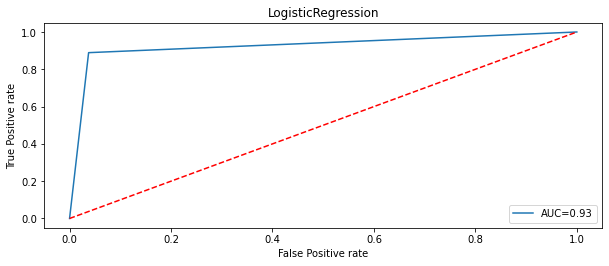

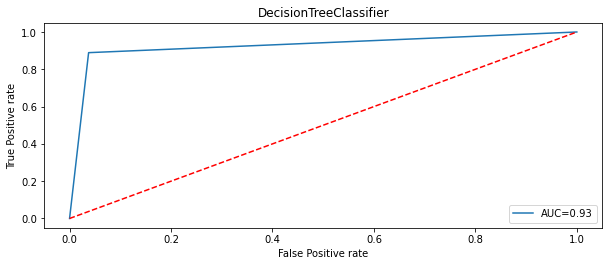

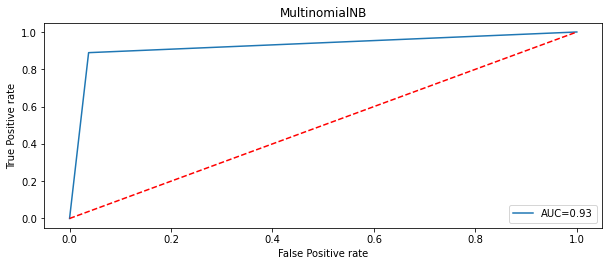

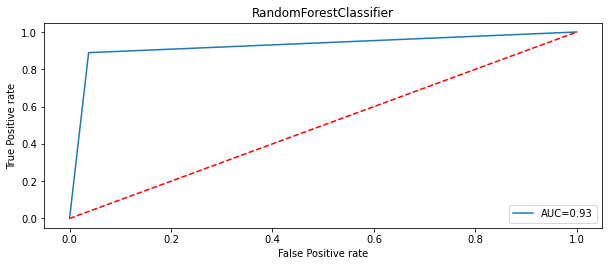

In [98]:
for name,model in models:
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    print('\n\n')

In [99]:
final=pd.DataFrame({'Model':Model,'Accuracy score':score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
final

Model  Accuracy score  cross_val_score  Roc_auc_curve
0      LogisticRegression       95.442308        96.102564      95.445865
1  DecisionTreeClassifier       95.788462        95.987179      95.789213
2           MultinomialNB       86.365385        85.000000      86.313925
3  RandomForestClassifier       92.596154        92.602564      92.582065

### Decision Tree Classifier gives the highest accuracy